<a href="https://colab.research.google.com/github/jesvin1/Basics/blob/master/TimeSeries_Finance_Udemy_Course.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Predictive Power Score
https://towardsdatascience.com/rip-correlation-introducing-the-predictive-power-score-3d90808b9598

In [5]:
!pip install ppscore

  Created wheel for ppscore: filename=ppscore-0.0.2-py2.py3-none-any.whl size=9629 sha256=b68094e45e4c84e993b21c6a800d5cac2e85fb087d7fdcf6aabc89abb4fca25f
  Stored in directory: /root/.cache/pip/wheels/29/32/a2/82782fc09f5cd68e401ff047201d38af8965fb94984db18aa5
Successfully built ppscore


In [6]:
import datetime as dt

tyear = dt.datetime.now().year
tmonth = dt.datetime.now().month
tdate = int(dt.datetime.now().day)

print(tyear,tmonth,tdate)


2020 5 7


In [7]:
import fix_yahoo_finance as yf
import datetime as datetime
import ppscore as pps
stocks = ['^GSPC','^GDAXI','^FTSE','^N225','^NSEI','^BSESN']
start = datetime.datetime(2000,1,1)
end = datetime.datetime(tyear,tmonth,tdate)
data = yf.download(stocks, start=start, end=end)

[*********************100%***********************]  6 of 6 downloaded


In [8]:
df = data.copy()
df.tail()

Open               ...    Volume          
                  ^BSESN        ^FTSE  ...     ^N225     ^NSEI
Date                                   ...                    
2020-04-30  33381.191406  6115.299805  ...  103400.0  931200.0
2020-05-01           NaN  5901.200195  ...   86600.0       NaN
2020-05-04  32748.140625  5763.100098  ...       NaN  687500.0
2020-05-05  32182.900391  5753.799805  ...       NaN  725200.0
2020-05-06  31577.630859          NaN  ...       NaN       0.0

[5 rows x 36 columns]

In [9]:
df = df.drop(['Low','Open','High','Close'],axis =1)


/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:3936: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [10]:
df.tail()

Adj Close               ...    Volume          
                  ^BSESN        ^FTSE  ...     ^N225     ^NSEI
Date                                   ...                    
2020-04-30  33717.621094  5901.200195  ...  103400.0  931200.0
2020-05-01           NaN  5763.100098  ...   86600.0       NaN
2020-05-04  31715.349609  5753.799805  ...       NaN  687500.0
2020-05-05  31453.509766  5849.399902  ...       NaN  725200.0
2020-05-06  31685.750000          NaN  ...       NaN       0.0

[5 rows x 12 columns]

In [11]:
df.describe()

Adj Close               ...         Volume              
             ^BSESN        ^FTSE  ...          ^N225         ^NSEI
count   5007.000000  5126.000000  ...    4982.000000  3.082000e+03
mean   17231.081788  5892.861821  ...  106939.181052  1.335168e+05
std    10883.505423  1018.652386  ...   63240.153122  1.697525e+05
min     2600.120117  3287.000000  ...       0.000000  0.000000e+00
25%     6306.405029  5209.200074  ...   67900.000000  0.000000e+00
50%    16958.390625  5954.150147  ...  110350.000000  1.272500e+05
75%    26029.090820  6652.100098  ...  143500.000000  1.966000e+05
max    41952.628906  7877.500000  ...  595200.000000  1.811000e+06

[8 rows x 12 columns]

In [12]:
df.isna().sum()

Adj Close  ^BSESN     290
           ^FTSE      171
           ^GDAXI     137
           ^GSPC      179
           ^N225      315
           ^NSEI     2215
Volume     ^BSESN     290
           ^FTSE      171
           ^GDAXI     137
           ^GSPC      179
           ^N225      315
           ^NSEI     2215
dtype: int64

#Plotting Data

In [0]:
import matplotlib.pyplot as plt

In [14]:
df.columns

MultiIndex([('Adj Close', '^BSESN'),
            ('Adj Close',  '^FTSE'),
            ('Adj Close', '^GDAXI'),
            ('Adj Close',  '^GSPC'),
            ('Adj Close',  '^N225'),
            ('Adj Close',  '^NSEI'),
            (   'Volume', '^BSESN'),
            (   'Volume',  '^FTSE'),
            (   'Volume', '^GDAXI'),
            (   'Volume',  '^GSPC'),
            (   'Volume',  '^N225'),
            (   'Volume',  '^NSEI')],
           )

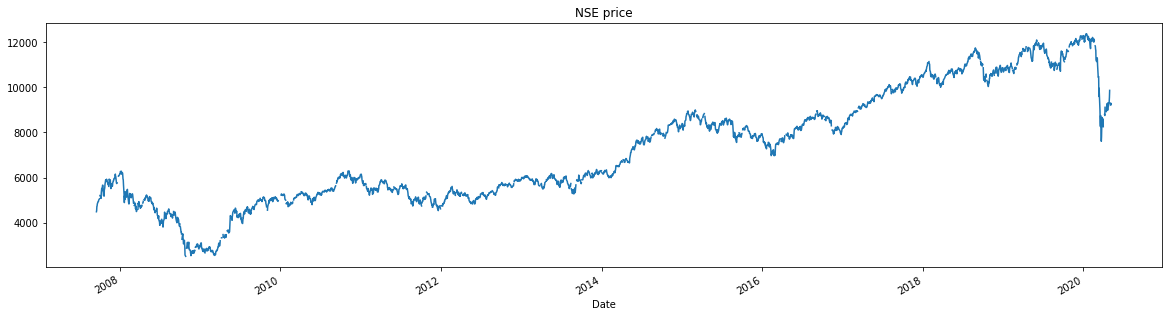

In [15]:
df[('Adj Close', '^NSEI')].plot(figsize=(20,5), title = 'NSE price')

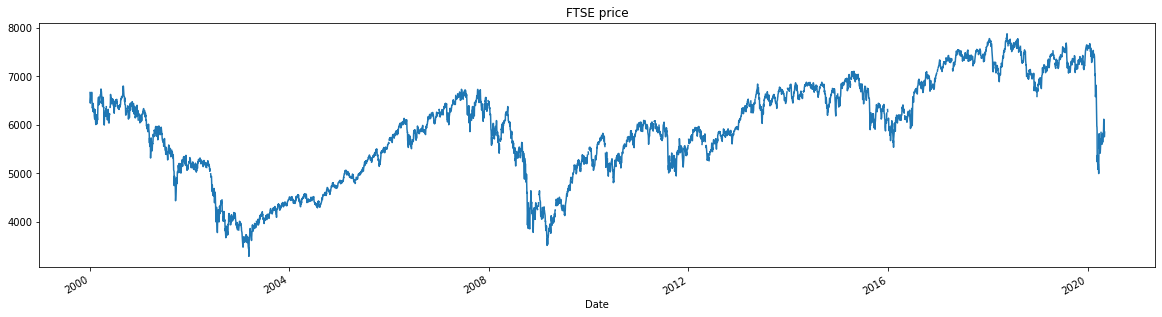

In [16]:
df[('Adj Close', '^FTSE')].plot(figsize=(20,5), title = 'FTSE price')

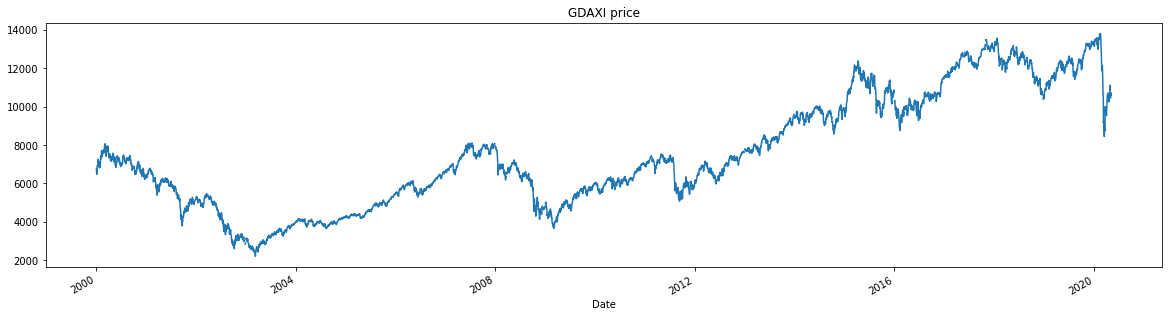

In [17]:
df[('Adj Close', '^GDAXI')].plot(figsize=(20,5), title = 'GDAXI price')

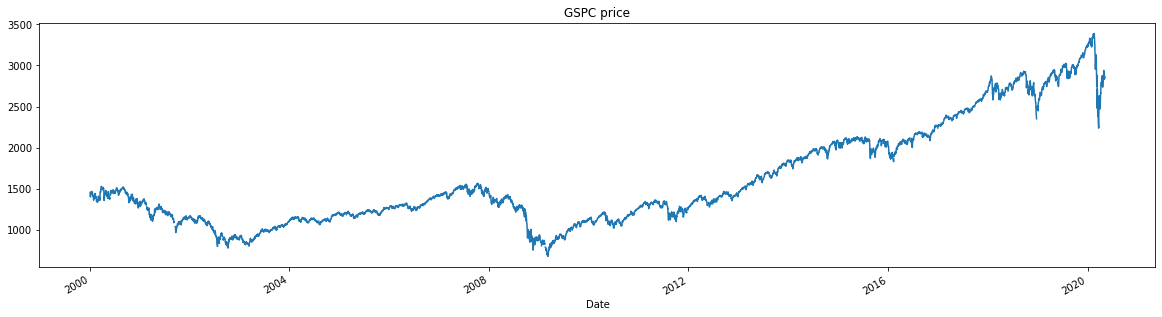

In [18]:
df[('Adj Close', '^GSPC')].plot(figsize=(20,5), title = 'GSPC price')

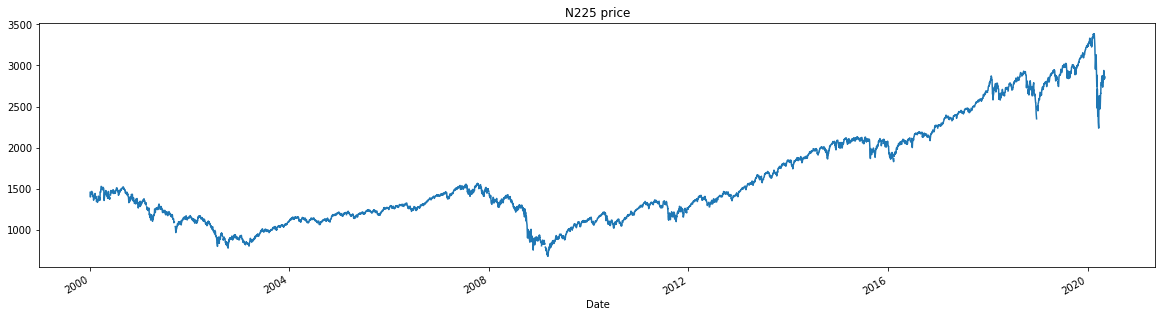

In [19]:
df[('Adj Close', '^GSPC')].plot(figsize=(20,5), title = 'N225 price')

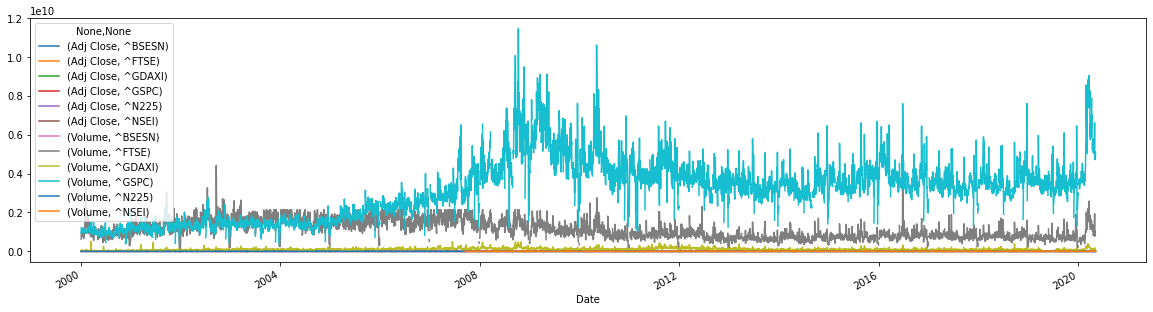

In [20]:
df.plot(figsize=(20,5))

Text(0.5, 1.0, 'FTSE Vs NSE')

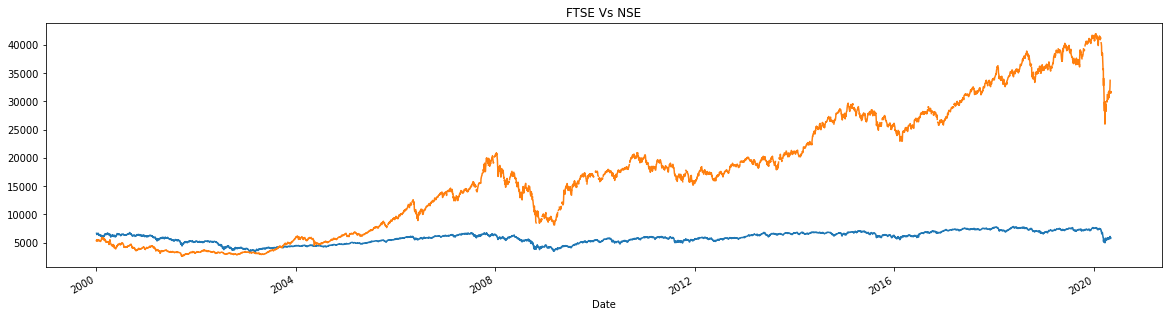

In [21]:
df[('Adj Close', '^FTSE')].plot(figsize=(20,5))
df[('Adj Close', '^BSESN')].plot(figsize=(20,5))
plt.title('FTSE Vs NSE')

#QQ Plot

In [0]:
import scipy.stats
import pylab

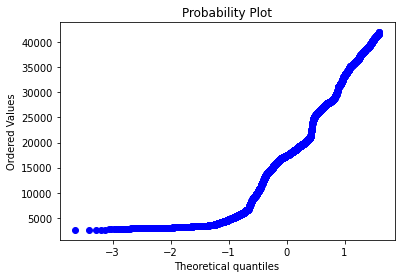

In [23]:
scipy.stats.probplot(df[('Adj Close', '^BSESN')],plot=pylab)
pylab.show()

In [24]:
df.index

DatetimeIndex(['2000-01-03', '2000-01-04', '2000-01-05', '2000-01-06',
               '2000-01-07', '2000-01-10', '2000-01-11', '2000-01-12',
               '2000-01-13', '2000-01-14',
               ...
               '2020-04-23', '2020-04-24', '2020-04-27', '2020-04-28',
               '2020-04-29', '2020-04-30', '2020-05-01', '2020-05-04',
               '2020-05-05', '2020-05-06'],
              dtype='datetime64[ns]', name='Date', length=5297, freq=None)

#Set the frequency of the dataset

In [0]:
df = df.asfreq('b')

In [26]:
df.head(10)

Adj Close                            ...        Volume            
                 ^BSESN        ^FTSE       ^GDAXI  ...         ^GSPC ^N225 ^NSEI
Date                                               ...                          
2000-01-03  5375.109863          NaN  6750.759766  ...  9.318000e+08   NaN   NaN
2000-01-04  5491.009766  6665.899902  6586.950195  ...  1.009000e+09   0.0   NaN
2000-01-05  5357.000000  6535.899902  6502.069824  ...  1.085500e+09   0.0   NaN
2000-01-06  5421.529785  6447.200195  6474.919922  ...  1.092300e+09   0.0   NaN
2000-01-07  5414.479980  6504.799805  6780.959961  ...  1.225200e+09   0.0   NaN
2000-01-10  5518.390137  6607.700195  6925.520020  ...  1.064800e+09   NaN   NaN
2000-01-11  5296.299805  6518.899902  6891.250000  ...  1.014000e+09   0.0   NaN
2000-01-12  5491.200195  6532.799805  6912.810059  ...  9.746000e+08   0.0   NaN
2000-01-13  5444.819824  6531.500000  6955.979980  ...  1.030400e+09   0.0   NaN
2000-01-14  5471.270020  6658.200195  7173.220215  ...  1.085900e+09   0.0   NaN

[10 rows x 12 columns]

#Missing Values

In [27]:
df.isna().sum()

Adj Close  ^BSESN     301
           ^FTSE      182
           ^GDAXI     148
           ^GSPC      190
           ^N225      326
           ^NSEI     2226
Volume     ^BSESN     301
           ^FTSE      182
           ^GDAXI     148
           ^GSPC      190
           ^N225      326
           ^NSEI     2226
dtype: int64

In [0]:
df['Adj Close', '^BSESN'] = df['Adj Close', '^BSESN'].fillna(method='ffill')
df['Adj Close', '^FTSE'] = df['Adj Close', '^FTSE'].fillna(method='ffill')
df['Adj Close', '^GDAXI'] = df['Adj Close', '^GDAXI'].fillna(method='ffill')
df['Adj Close', '^GSPC'] = df['Adj Close', '^GSPC'].fillna(method='ffill')
df['Adj Close', '^N225'] = df['Adj Close', '^N225'].fillna(method='ffill')
df['Adj Close', '^NSEI'] = df['Adj Close', '^NSEI'].fillna(method='ffill')

df['Adj Close', '^N225'] = df['Adj Close', '^N225'].fillna(method='bfill')
df['Adj Close', '^NSEI'] = df['Adj Close', '^NSEI'].fillna(method='bfill')
df['Adj Close', '^FTSE'] = df['Adj Close', '^FTSE'].fillna(method='bfill')


In [0]:
df_proc = df['Adj Close', '^BSESN']

In [30]:
df_proc.isna().sum()

0

#Splitting the train and test data

In [0]:
size = int(len(df_proc) * .08)

In [0]:
df_train = df_proc.iloc[:size]
df_test = df_proc.iloc[size:]

In [33]:
df_train.tail()


Date
2001-08-10    3316.209961
2001-08-13    3287.620117
2001-08-14    3331.889893
2001-08-15    3331.889893
2001-08-16    3337.909912
Freq: B, Name: (Adj Close, ^BSESN), dtype: float64

In [34]:
df_test.head()

Date
2001-08-17    3296.709961
2001-08-20    3278.919922
2001-08-21    3297.429932
2001-08-22    3297.429932
2001-08-23    3308.790039
Freq: B, Name: (Adj Close, ^BSESN), dtype: float64

#Stationarity and Non Stationarity

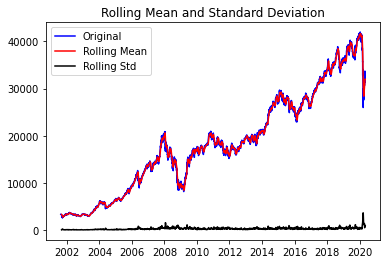

Results of dickey fuller test
Test Statistics                  -1.074825
p-value                           0.725006
No. of lags used                 27.000000
Number of observations used    4856.000000
critical value (1%)              -3.431697
critical value (5%)              -2.862135
critical value (10%)             -2.567087
dtype: float64


In [37]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd
#Test for staionarity
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    
test_stationarity(df_test)

#Test Stat --> It should less than the 1%,5% or 10% Then we can say time series is stationary 
#P-value --> 
#No. of lags--> autocorrelation
#No of observation --> Sum of lags and observation equal to total count in the dataset


